Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513/EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 1: Introdução e Regressão Linear

Este é um exercício de introdução ao Python e bibliotecas básicas. Também serão abordados conceitos básicos de exploração de dados e regressão linear.

<!--O exercício resolvido, em formato `.ipynb`, completo com explicações e gráficos integrados, deve ser submetido via moodle até o prazo especificado.-->

# Preparação / Revisão

- Ler Watt _(Machine Learning Refined)_ cap. 1
- Ler Watt apêndices A, B (de B.3 apenas os exemplos B.1.a e B.2.a) e D
- Ler e praticar todos os tutoriais fornecidos (exceto os exemplos mais complexos do tutorial de NumPy)
- Revisar (caso necessário) conceitos básicos de probabilidade e estatística: variáveis aleatórias, distribuição/densidade de probabilidade, histograma, média, variância, correlação

In [3]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\bx,\by)} = \frac{\bx^T \by}{\|\bx\|\|\by\|}
$$

# ~~ Resposta - Exercício 1.1.1 --

In [4]:
def cosine_similarity(x,y):
    s = s = (x.T@y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return s

# Testes
x = np.array([1,2,3,4])
y = np.array([2,2,2,2])
z = np.array([2,-2,2,-2])
print(cosine_similarity(x,y)) # = 0.9128709291752769
print(cosine_similarity(x,z)) # = -0.18257418583505536

0.9128709291752769
-0.18257418583505536


### Dicas

- Use o operator @ (ver [documentação](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)) ao invés de `.dot()` para implementar  multiplicação matriz-matriz ou matriz-vetor, por exemplo: `C = A @ B`
- Funções úteis:

```python
np.linalg.norm()
```

2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

# ~~ Resposta - Exercício 1.1.2 --

In [5]:
A=np.array([[1,2],[3,4],[5,6]])
print("A:\n",A,"\n")

B=np.ones((3,2))
print("B:\n",B,"\n")

AtB=A.T@B
print("AtB:\n",AtB,"\n")

BAt=B@A.T
print("BAt:\n",BAt)

A:
 [[1 2]
 [3 4]
 [5 6]] 

B:
 [[1. 1.]
 [1. 1.]
 [1. 1.]] 

AtB:
 [[ 9.  9.]
 [12. 12.]] 

BAt:
 [[ 3.  7. 11.]
 [ 3.  7. 11.]
 [ 3.  7. 11.]]


3. Considere os vetores abaixo.

# ~~ Resposta - Exercício 1.1.3 --

In [6]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
b = np.array([1,2,3])
print('A:\n',A,'\n')
print('b:\n',b,'\n')
print('\n-----------------------\n')

print("b*A: \n",b*A,'\n')
print("A*b:\n",A*b,'\n')

print("b@A:\n",b@A,'\n')
print("A@b:\n",A@b,'\n')
print('\n-----------------------\n')

v=np.array([[1,2,3]])

print("v*A:\n",b*A,'\n')
print("A*v:\n",A*b,'\n')

print("v@A:\n",b@A,'\n')
print("A@v:\n",A@b)


A:
 [[1 0 1]
 [0 1 0]
 [1 1 1]] 

b:
 [1 2 3] 


-----------------------

b*A: 
 [[1 0 3]
 [0 2 0]
 [1 2 3]] 

A*b:
 [[1 0 3]
 [0 2 0]
 [1 2 3]] 

b@A:
 [4 5 4] 

A@b:
 [4 2 6] 


-----------------------

v*A:
 [[1 0 3]
 [0 2 0]
 [1 2 3]] 

A*v:
 [[1 0 3]
 [0 2 0]
 [1 2 3]] 

v@A:
 [4 5 4] 

A@v:
 [4 2 6]


In [7]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [8]:
b = np.array([1,2,3])
b

array([1, 2, 3])

Explique o porquê do resultado abaixo.

In [9]:
np.all(b*A == A*b)

True

### Resposta ex. 1.1.3:
`np.all(b*A == A*b)==True` pois em ambas as operações de **broadcasting** o tensor `b` multiplica a matriz `A` elemento a elemento. Diferentemente de multiplicar a matriz `A` pelo tensor `b` através da operação de multiplicação de matrizes `@`, que retornaria `b*A=[4 5 4]`$\neq$`A*b=[4 2 6]` para o primeiro caso e haveria para o segundo caso , já que na multiplicação de matrizes a ordem da multiplicação altera o resultado. 

# 2. Manipulando dados

1. Baixe o arquivo `bitcoin_price.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o notebook fornecido de exemplo do Pandas e/ou qualquer outro tutorial de Pandas (https://pandas.pydata.org/pandas-docs/stable/10min.html)

# ~~ Resposta - Exercícios 1.2.1 e 1.2.2 --

In [10]:
df = pd.read_csv(r'C:\Users\fvhma\Desktop\Exercicios_corrigidos_de_Machine_Learning_Felipe_Manhaes\data\bitcoin_cash_price.csv')
df.head() 


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


# ~~ Resposta - Exercício 1.2.3 --

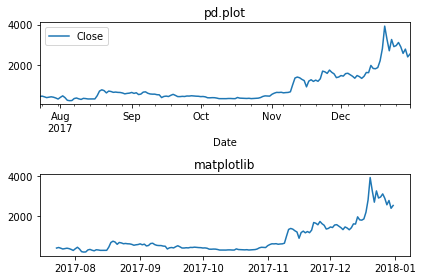

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df_2017 = df.loc[df['Date'].dt.year == 2017]
X = np.array(df_2017['Date'])
Y = np.array(df_2017['Close'])

fig, (ax1,ax2) = plt.subplots(2,1)

df_2017.plot('Date','Close',ax=ax1)
ax2.plot(X,Y)
ax1.set_title("pd.plot")
ax2.set_title("matplotlib")
fig.tight_layout()

# 3. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [12]:
df = pd.read_csv(r'C:\Users\fvhma\Desktop\Exercicios_corrigidos_de_Machine_Learning_Felipe_Manhaes\data\Advertising.csv',index_col=0)
df.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Trace o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
2. Calcule a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
3. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
4. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

# ~~ Resposta - Exercício 1.3.1 --

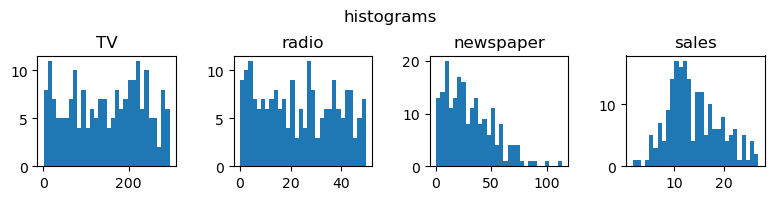

In [13]:
fig,ax = plt.subplots(1,4,figsize=(8,2),dpi=100)
fig.suptitle("histograms")
fig.tight_layout()
for i,k in enumerate(df.keys()):
    ax[i].hist(df[k],bins=30)
    ax[i].title.set_text(k)
#fig.show()

# ~~ Resposta - Exercício 1.3.2 --

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


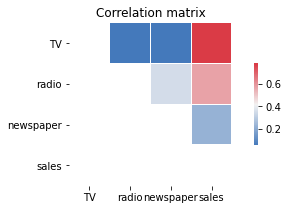

In [14]:
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.tril_indices_from(mask)]= True
fif,ax = plt.subplots(figsize=(8,3))
fig.tight_layout()
cmap=sns.diverging_palette(250,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,square=True,linewidth=.5,cbar_kws={"shrink": .5},ax=ax)
ax.set_title("Correlation matrix")
corr

# ~~ Resposta - Exercício 1.3.3 --

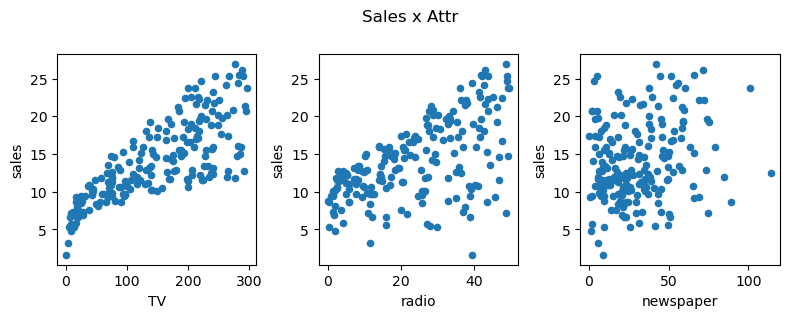

In [15]:
fig,ax = plt.subplots(1,3,figsize=(8,3),dpi=100)
fig.suptitle("Sales x Attr")
fig.tight_layout()
keys = list(df.keys())
keys.remove('sales')
m = LinearRegression()

for i,k in enumerate(keys):
    df.plot.scatter(k,'sales',ax=ax[i])
    X = df[k].values[:,np.newaxis]
    #m.fit(X,df['sales'])
    #ax[i].plot(X,m.predict(X),'k')
#fig.show()

# ~~ Resposta - Exercícios 1.3.4 --

### Resposta 1.3.4:

Pela exploração dos dados pode-se observar uma correlação mais forte entre as vendas e os anúncios de TV, que tem uma maior densidade de dados, enquanto que esta correlação é bem mais alta que aquela entre as vendas e os annúncios de jornal. O investimento nos anúncios em Rádio e TV são então de maior eficiência que os de jornal. 

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

# ~~ Resposta - Exercícios 1.3.5 --

In [16]:
X = df.to_numpy()[:,0:-1]
y = df.to_numpy()[:,-1]
print(X.shape)
print(y.shape)

(200, 3)
(200,)


# ~~ Resposta - Exercícios 1.3.6 --

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


7. Treine um modelo de regressão linear sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
7. Calcule a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
8. (OPCIONAL) Encontre alguma forma de visualizar o modelo treinado ou suas predições.

# ~~ Resposta - Exercícios 1.3.7 --

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

# ~~ Resposta - Exercícios 1.3.8 --

In [28]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse =np.sqrt(mean_squared_error(y_train,y_pred_train))
test_rmse =np.sqrt(mean_squared_error(y_test,y_pred_test))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1.5513912323520802
Test RMSE: 2.09812256349568


# ~~ Resposta - Exercícios 1.3.9 --


<function matplotlib.pyplot.show(close=None, block=None)>

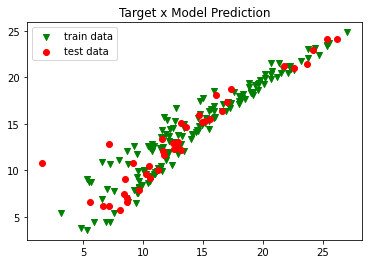

In [37]:
fig1=plt.figure()
plt.title('Target x Model Prediction')

plt.scatter(y_train,model.predict(X_train),color='g',marker='v',label ='train data')
plt.scatter(y_test,model.predict(X_test),color='r',marker='o',label ='test data')

plt.legend()

plt.show

### Dicas

- Funções úteis
```python
pd.hist()
pd.DataFrame.corr()
pd.DataFrame.to_numpy()
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
np.sqrt()
```
- Caso deseje uma referência, consulte o tutorial disponível em:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155. Note, porém, que não é necessário usar as funções da biblioteca `seaborn`.